In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import TwoSlopeNorm
%matplotlib widget
plt.ioff()

# DATA

In [2]:
name ="speedups/cell_len_values v1.0 2025-02-10 10:49.npz"
data = np.load(name, allow_pickle=True)

hm_states = data['hm_states']
vhl_mask = data['vhl_mask']
time = data['time'].item()
param = data["param"].item()

In [3]:
IS_3D = False

# FIGURE & MAP

In [4]:
# Indices of height_maps to display
indices = [0, -1]  # First and last

# Compute the common range for normalization
vmin = min([hm_states[i][0].min() for i in indices])
vmax = max([hm_states[i][0].max() for i in indices])
norm = TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
cmap = "coolwarm"

# Create a figure with two side-by-side subplots
FIG, AXES = plt.subplots(1, 2, figsize=(12, 7), subplot_kw={'projection': '3d'} if IS_3D else {})

AXES[0].set_title("Initial Height Map")
AXES[1].set_title("Final Height Map")

# Display the first and last height_map
for ax, idx in zip(AXES, indices):
    height_map = hm_states[idx][0]
    traj = np.array(hm_states[idx][1])
    if IS_3D:
        y = np.arange(height_map.shape[0])
        x = np.arange(height_map.shape[1])
        x_meshed, y_meshed = np.meshgrid(x, y)
        # 3D plot
        res = ax.plot_surface(x_meshed, y_meshed, height_map, cmap=cmap, norm=norm)
        
        if traj.size > 0:
            ax.plot(traj[:, 1], traj[:, 0], np.full(traj[:,0].shape, np.min(height_map)), color="red", marker='o', label="Object Trajectory")
        ax.set_zlabel("Z")
    else:
        # 2D plot
        res = ax.matshow(height_map, cmap=cmap, norm=norm, origin="lower")
        ax.xaxis.set_label_position("top")
        ax.yaxis.set_label_position("left")
        if traj.size > 0:
            ax.plot(traj[:, 1], traj[:, 0], color="red", marker='o', label="Object Trajectory")
    
    # Common settings
    ax.set_xlabel(f"X ({param['cell_edge_length']} mm per cell)")
    ax.set_ylabel(f"Y ({param['cell_edge_length']} mm per cell)")
    
cbar = FIG.colorbar(res, ax=AXES, shrink=0.8, location="right", label="Height [mm]")


# DISPLAY

{'field_edge_length': 1000, 'cell_edge_length': 5, 'grid_size': (200, 200), 'k': 0.125, 'vehicule_depth': 30, 'angle_of_respose': 30, 'erosion_threshold': 10, 'nb_checkpoints': 20, 'ellipse_semi_major_axis': 10, 'ellipse_semi_minor_axis': 6}


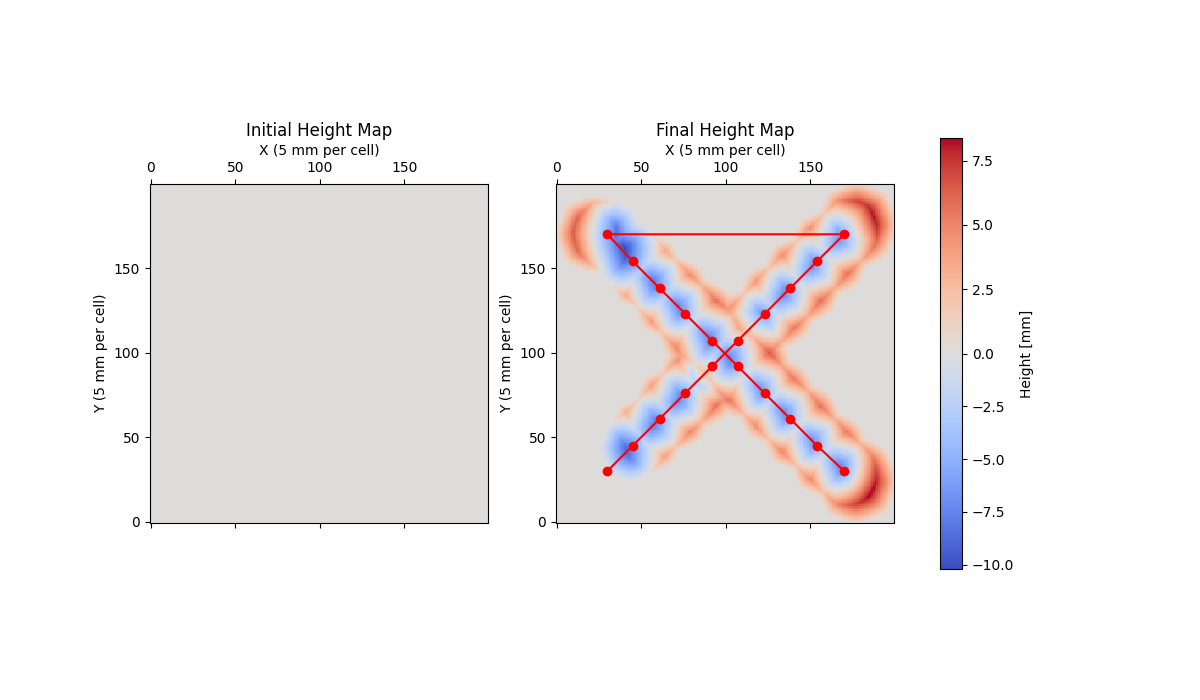

In [5]:
print(param)
plt.show()